In [1]:
# %matplotlib notebook
%matplotlib inline

# %connect_info

import jzap.misc
text = """
Jupyter connect hash:
{word}

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('{word}', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    
"""
print(text.format(word=jzap.misc.notebook_word()))
print("Last run: {}".format(jzap.misc.timestamp()))


Jupyter connect hash:
cleaning

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('cleaning', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    

Last run: 2018-05-19-00h58m35s


In [2]:
import jzap
import replay

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.stats
from statsmodels.formula.api import ols, mixedlm
from statsmodels.stats.anova import anova_lm
import patsy
import statsmodels.api as sm

from pdb import set_trace

import warnings
warnings.filterwarnings('ignore')

path = '/lab/data/behavior_replay_180518.txt'

data = jzap.misc.load_table(path)
print(data.columns)
print(data.head())

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Index([u'mouse', u'date', u'day_sum_eqdist_0_1_plus',
       u'day_frac_eqdist_0_1_plus', u'day_sum_eqdist_0_1_minus',
       u'day_frac_eqdist_0_1_minus', u'dprime', u'hmm_dprime',
       u'hmm_dprime_noneutral', u'hmm_dprime_run2', u'hmm_dprime_run3',
       u'hmm_dprime_run4', u'hmm_engagement', u'training_licks',
       u'lick_latency', u'running', u'replay_freq_0_1_plus',
       u'replay_freq_0_1_neutral', u'replay_freq_0_1_minus', u'n_stimuli_plus',
       u'n_stimuli_neutral', u'n_stimuli_minus', u'n_ensure', u'ncorrect_plus',
       u'ncorrect_minus', u'ncorrect_neutral', u'nfalse_plus', u'nfalse_minus',
       u'nfalse_neutral', u'hmm_ncorrect_plus', u'hmm_ncorrect_minus',
       u'hmm_ncorrect_neutral', u'hmm_nfalse_plus', u'hmm_nfalse_minus',
       u'hmm_nfalse_neutral', u'hmm_nfalse_all', u'hmm_ncorrect_all',
       u'fraction_visually_driven_50_plus',
       u'fraction_visually_driven_50_minus',
       u'fraction_visually_driven_50_neutral',
       u'fraction_visually_dri

In [3]:
import replay.lib.settings

colors = replay.lib.settings.colors()

## Bias/criterion

Why are these so different?

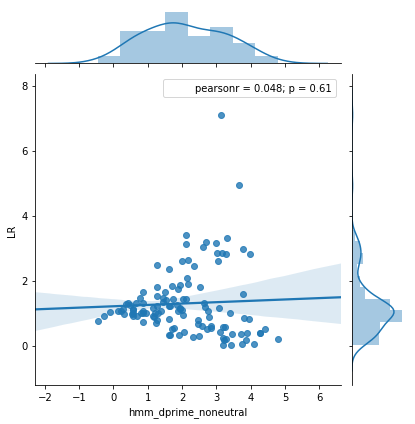

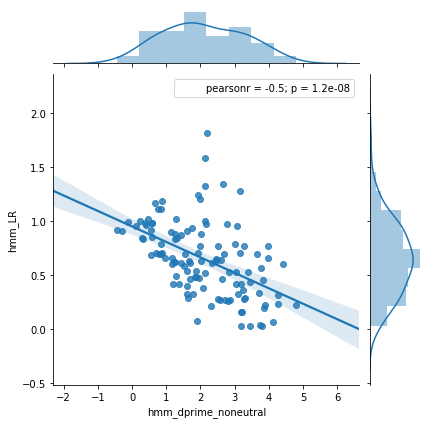

In [4]:
sns.jointplot(x='hmm_dprime_noneutral', y='LR', data=data, kind='reg')
sns.jointplot(x='hmm_dprime_noneutral', y='hmm_LR', data=data, kind='reg')

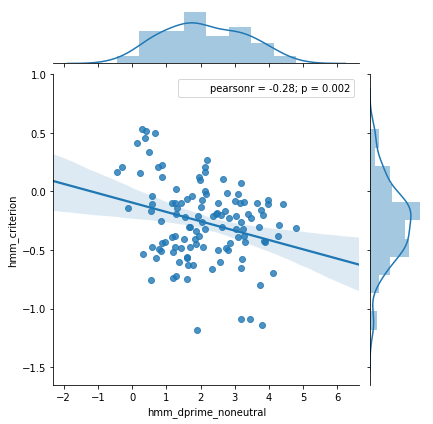

In [5]:
sns.jointplot(x='hmm_dprime_noneutral', y='hmm_criterion', data=data, kind='reg')

These measures really are related to d' and not days of training

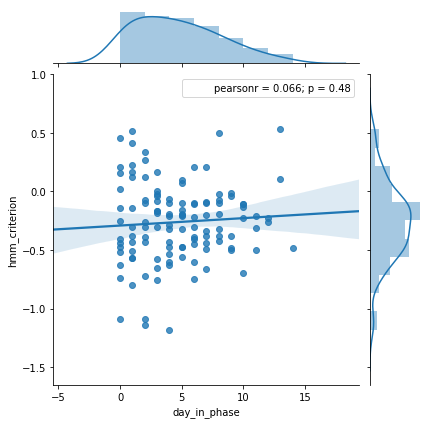

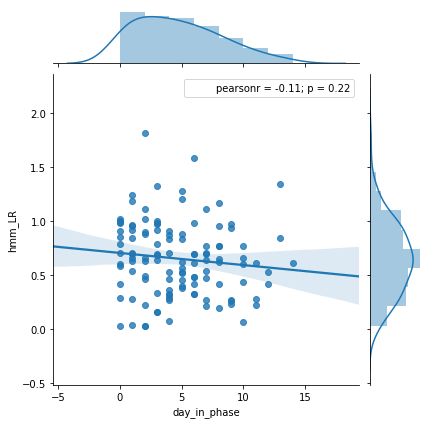

In [6]:
sns.jointplot(x='day_in_phase', y='hmm_criterion', data=data, kind='reg')
sns.jointplot(x='day_in_phase', y='hmm_LR', data=data, kind='reg')

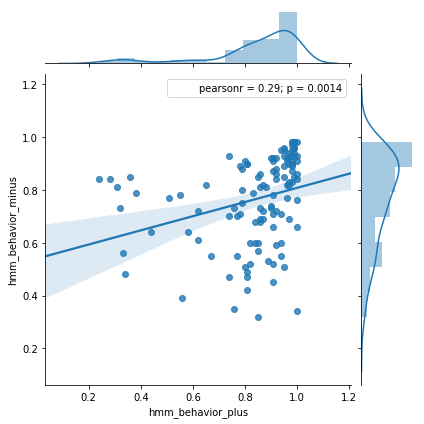

In [7]:
sns.jointplot(x='hmm_behavior_plus', y='hmm_behavior_minus', data=data, kind='reg')

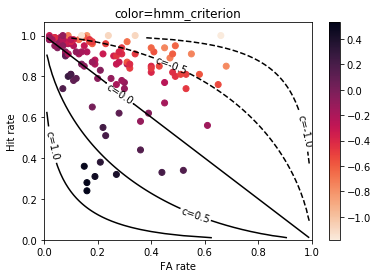

In [8]:
x = 'hmm_behavior_minus'  # convert to FA later
y = 'hmm_behavior_plus'
hue = 'hmm_criterion'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
x_data = 1 - np.array(data_no_nan[x])
y_data = np.array(data_no_nan[y])
hue_data = np.array(data_no_nan[hue])

def c(H_rate, FA_rate):
    return -1 / 2. * (scipy.stats.norm.ppf(H_rate) + scipy.stats.norm.ppf(FA_rate))
label = "c"
f = c

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z = f(Y, X)

CS = plt.contour(X, Y, Z, levels=[-1, -0.5, 0, 0.5, 1], colors='black')
plt.clabel(CS, inline=True, fontsize=10, fmt="{}=%1.1f".format(label))
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.axis('square')

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel('FA rate')
plt.ylabel('Hit rate')
plt.title('color={}'.format(hue));

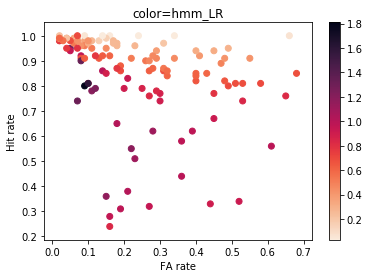

In [9]:
x = 'hmm_behavior_minus'  # convert to FA later
y = 'hmm_behavior_plus'
hue = 'hmm_LR'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
x_data = 1 - np.array(data_no_nan[x])
y_data = np.array(data_no_nan[y])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel('FA rate')
plt.ylabel('Hit rate')
plt.title('color={}'.format(hue));

Text(0.5,0,'FA rate')

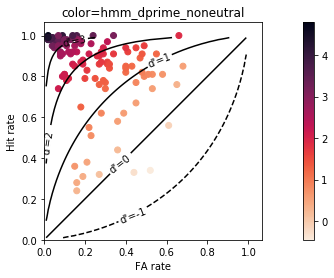

In [10]:
x = 'hmm_behavior_minus'  # convert to FA later
y = 'hmm_behavior_plus'
hue = 'hmm_dprime_noneutral'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
x_data = 1 - np.array(data_no_nan[x])
y_data = np.array(data_no_nan[y])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel('FA rate')
plt.ylabel('Hit rate')
plt.title('color={}'.format(hue));
def dprime(H_rate, FA_rate):
    return scipy.stats.norm.ppf(H_rate) - scipy.stats.norm.ppf(FA_rate)
label = "d'"
f = dprime

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z = f(Y, X)

CS = plt.contour(X, Y, Z, levels=[-1, 0, 1, 2, 3], colors='black')
plt.clabel(CS, inline=True, fontsize=10, fmt="{}=%1.0f".format(label))
plt.xlim(0,1)
plt.ylim(0,1)
plt.axis('square')
plt.ylabel('Hit rate')
plt.xlabel('FA rate')

(-2.2564363561634138, 2.2862289115794696, -2.0, 2.5426652677428834)

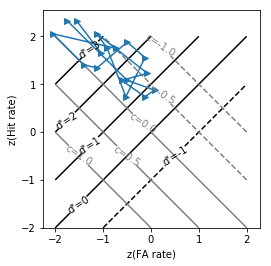

In [11]:
def dprime(z_H_rate, z_FA_rate):
    return z_H_rate - z_FA_rate

def c(z_H_rate, z_FA_rate):
    return -1 / 2. * (z_H_rate + z_FA_rate)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z1 = dprime(Y, X)
Z2 = c(Y, X)

CS1 = plt.contour(X, Y, Z1, levels=[-1, 0, 1, 2, 3], colors='black')
plt.clabel(CS1, inline=True, fontsize=10, fmt="d'=%1.0f")

CS2 = plt.contour(X, Y, Z2, levels=[-1, -0.5, 0, 0.5, 1], colors='0.5')
plt.clabel(CS2, inline=True, fontsize=10, fmt="c=%1.1f")

plt.ylabel('z(Hit rate)')
plt.xlabel('z(FA rate)')

# mice = ['AS20', 'AS41', 'CB173', 'OA32', 'OA34', 'OA36', 'OA37', 'OA38']
mouse = 'AS20'

data_sub = data[data['mouse'].str.contains(mouse)]
z_H_rate = scipy.stats.norm.ppf(data_sub['hmm_behavior_plus'])
z_FA_rate = scipy.stats.norm.ppf(1 - data_sub['hmm_behavior_minus'])
plt.plot(z_FA_rate, z_H_rate, '->')
# plt.xlim(-3,3)
# plt.ylim(-3,3)
plt.axis('square')
# x = 'hmm_behavior_minus'  # convert to FA later
# y = 'hmm_behavior_plus'
# hue = 'hmm_dprime_noneutral'
# # cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
# cmap = sns.cm.rocket_r

# fig, ax = plt.subplots()
# data_no_nan = data[[x, y, hue]]
# data_no_nan.dropna(inplace=True)
# x_data = 1 - np.array(data_no_nan[x])
# y_data = np.array(data_no_nan[y])
# hue_data = np.array(data_no_nan[hue])

# plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
# plt.colorbar(ax=ax)
# plt.xlabel('FA rate')
# plt.ylabel('Hit rate')
# plt.title('color={}'.format(hue));

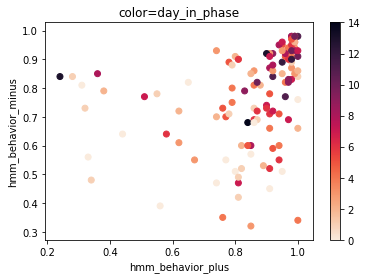

In [12]:
x = 'hmm_behavior_plus'
y = 'hmm_behavior_minus'
hue = 'day_in_phase'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x])
y_data = np.array(data_no_nan[y])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x)
plt.ylabel(y)
plt.title('color={}'.format(hue));

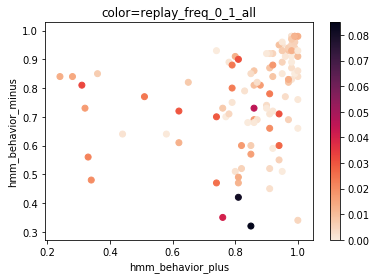

In [13]:
x = 'hmm_behavior_plus'
y = 'hmm_behavior_minus'
hue = 'replay_freq_0_1_all'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x])
y_data = np.array(data_no_nan[y])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x)
plt.ylabel(y)
plt.title('color={}'.format(hue));

## Criterion effect on replay rate

Overall correlations weak

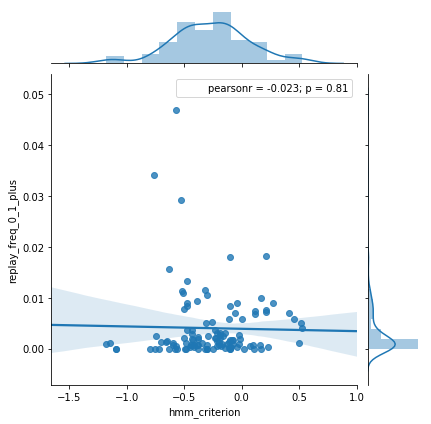

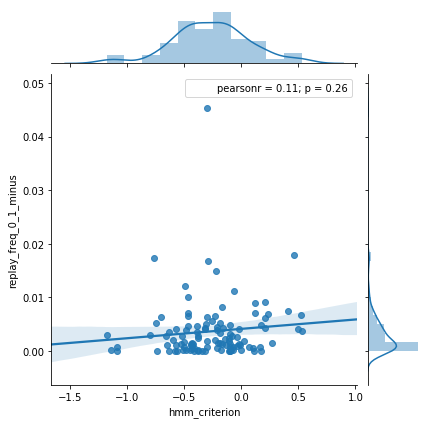

In [14]:
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_plus', data=data, kind='reg')
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_minus', data=data, kind='reg')

neither low nor high criterion correlates with CSp replay

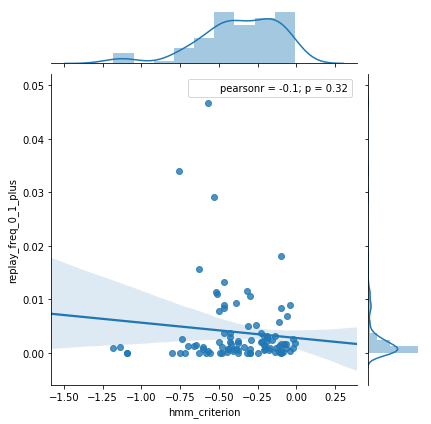

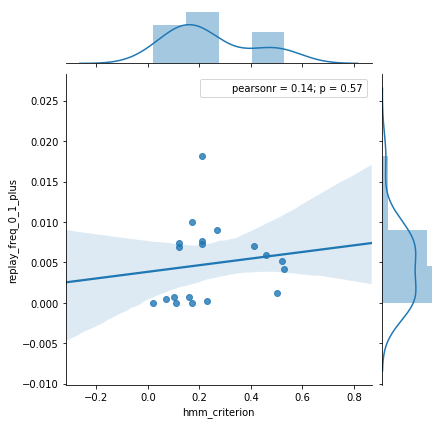

In [15]:
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_plus', data=data[data['hmm_criterion']<0], kind='reg')
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_plus', data=data[data['hmm_criterion']>0], kind='reg')

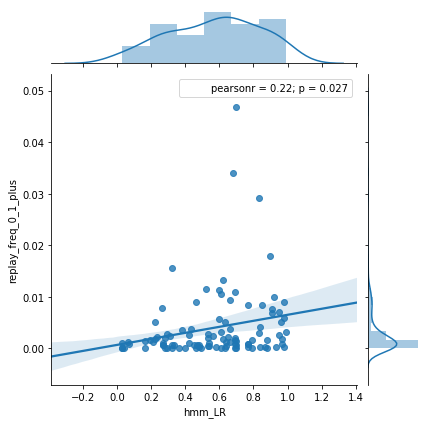

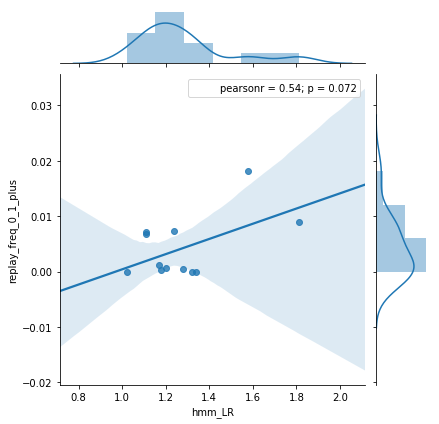

In [16]:
sns.jointplot(x='hmm_LR', y='replay_freq_0_1_plus', data=data[data['hmm_LR']<1], kind='reg')
sns.jointplot(x='hmm_LR', y='replay_freq_0_1_plus', data=data[data['hmm_LR']>1], kind='reg')

What about the middle half of the data, where learning is presumably happening?

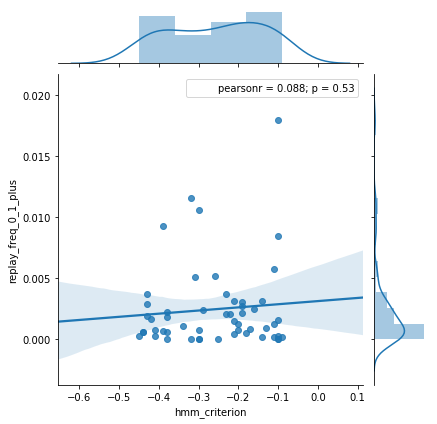

In [17]:
first_quant = data.hmm_criterion.quantile(0.25)
third_quant = data.hmm_criterion.quantile(0.75)

mid_half_data = data[(data['hmm_criterion'] > first_quant) & (data['hmm_criterion'] < third_quant)]
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_plus', data=mid_half_data, kind='reg')

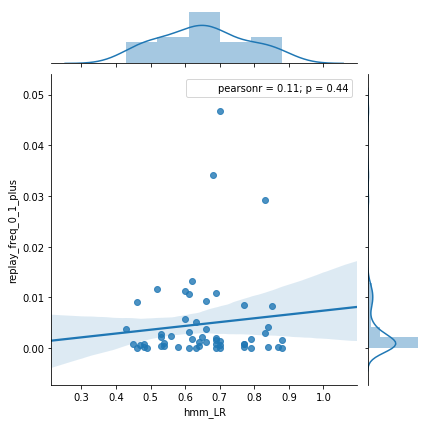

In [18]:
first_quant = data.hmm_LR.quantile(0.25)
third_quant = data.hmm_LR.quantile(0.75)

mid_half_data = data[(data['hmm_LR'] > first_quant) & (data['hmm_LR'] < third_quant)]
sns.jointplot(x='hmm_LR', y='replay_freq_0_1_plus', data=mid_half_data, kind='reg')

At low criterion, mouse has presumably already learned and not getting quinine, so shouldn't care, but at high criterion mouse is actively avoiding quinine

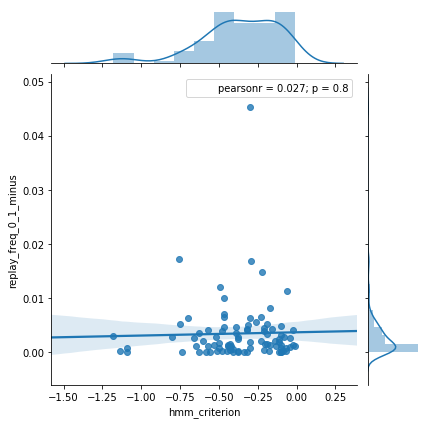

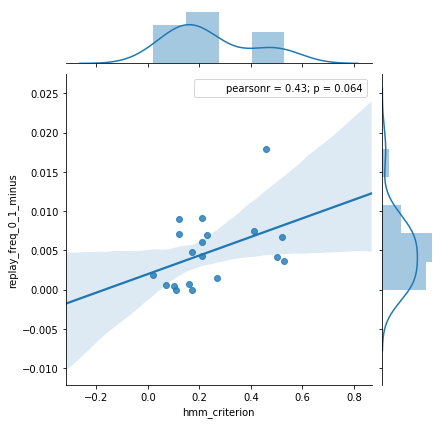

In [19]:
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_minus', data=data[data['hmm_criterion']<0], kind='reg')
sns.jointplot(x='hmm_criterion', y='replay_freq_0_1_minus', data=data[data['hmm_criterion']>0], kind='reg')

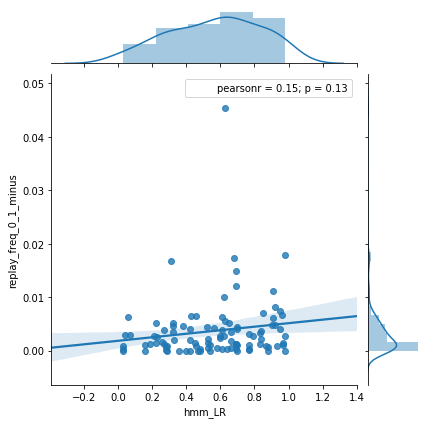

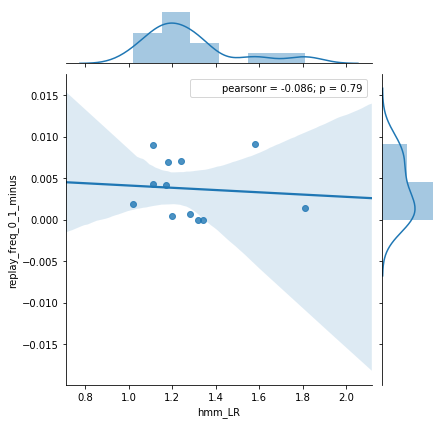

In [20]:
sns.jointplot(x='hmm_LR', y='replay_freq_0_1_minus', data=data[data['hmm_LR']<1], kind='reg')
sns.jointplot(x='hmm_LR', y='replay_freq_0_1_minus', data=data[data['hmm_LR']>1], kind='reg')

### Combining CSp and CSm replay

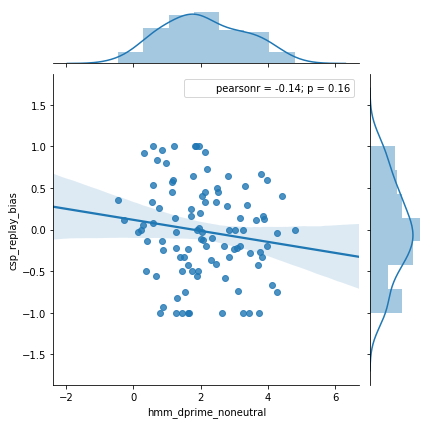

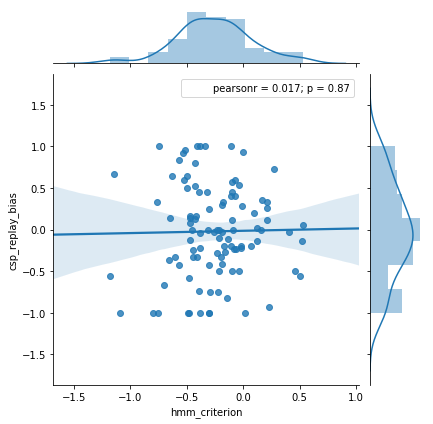

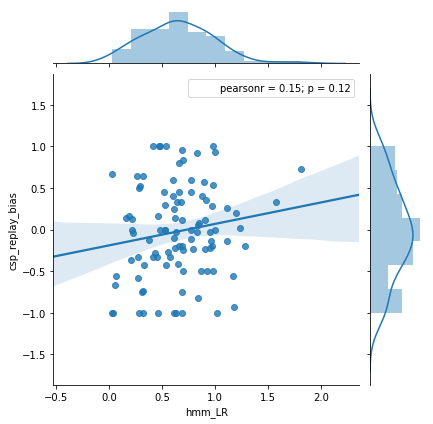

In [21]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral', 'hmm_LR']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
# csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / data_sub['replay_freq_0_1_plus']
# csp_replay_bias = data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']
# csp_replay_bias = data_sub['replay_freq_0_1_plus'] / data_sub['replay_freq_0_1_minus']
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

sns.jointplot(x='hmm_dprime_noneutral', y='csp_replay_bias', data=data_sub, kind='reg')
sns.jointplot(x='hmm_criterion', y='csp_replay_bias', data=data_sub, kind='reg')
sns.jointplot(x='hmm_LR', y='csp_replay_bias', data=data_sub, kind='reg')

Regress dprime out of plus and minus replay before calculating replay ratio

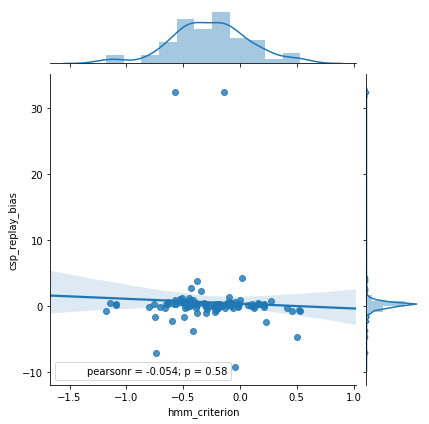

In [22]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral', 'hmm_LR']]

data_sub.dropna(inplace=True)

data_sub = data_sub.assign(
    plus_regress_dprime=jzap.analysis.regress_out(data_sub.replay_freq_0_1_plus, data_sub.hmm_dprime_noneutral),
    minus_regress_dprime=jzap.analysis.regress_out(data_sub.replay_freq_0_1_minus, data_sub.hmm_dprime_noneutral))

csp_replay_bias = (data_sub['plus_regress_dprime'] - data_sub['minus_regress_dprime']) / \
    (data_sub['plus_regress_dprime'] + data_sub['minus_regress_dprime'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

sns.jointplot(x='hmm_criterion', y='csp_replay_bias', data=data_sub, kind='reg')

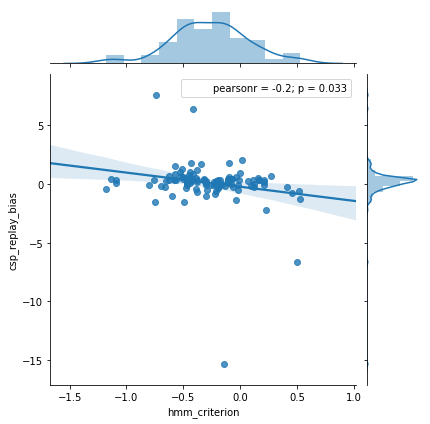

In [23]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime']]

data_sub.dropna(inplace=True)

data_sub = data_sub.assign(
    plus_regress_dprime=jzap.analysis.regress_out(data_sub.replay_freq_0_1_plus, data_sub.hmm_dprime),
    minus_regress_dprime=jzap.analysis.regress_out(data_sub.replay_freq_0_1_minus, data_sub.hmm_dprime))

csp_replay_bias = (data_sub['plus_regress_dprime'] - data_sub['minus_regress_dprime']) / \
    (data_sub['plus_regress_dprime'] + data_sub['minus_regress_dprime'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

sns.jointplot(x='hmm_criterion', y='csp_replay_bias', data=data_sub, kind='reg')

Regress dprime out of replay ratio

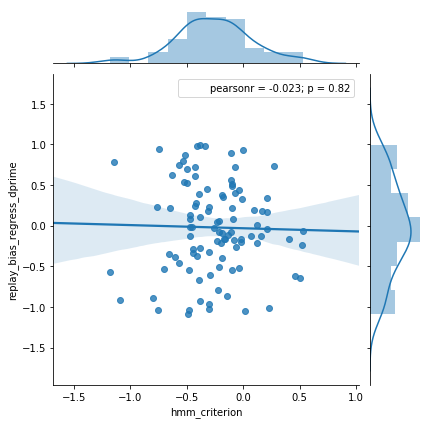

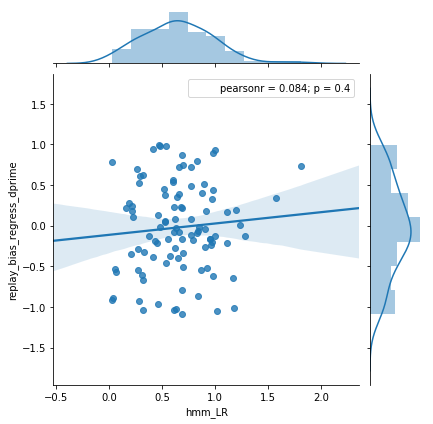

In [24]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral', 'hmm_LR']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
    
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias
data_sub.dropna(inplace=True)

data_sub = data_sub.assign(
    replay_bias_regress_dprime=jzap.analysis.regress_out(data_sub.csp_replay_bias, data_sub.hmm_dprime_noneutral))

sns.jointplot(x='hmm_criterion', y='replay_bias_regress_dprime', data=data_sub, kind='reg')
sns.jointplot(x='hmm_LR', y='replay_bias_regress_dprime', data=data_sub, kind='reg')

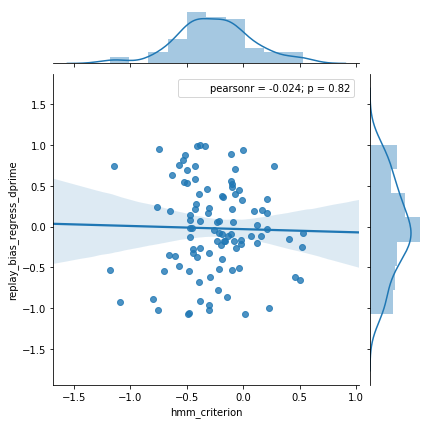

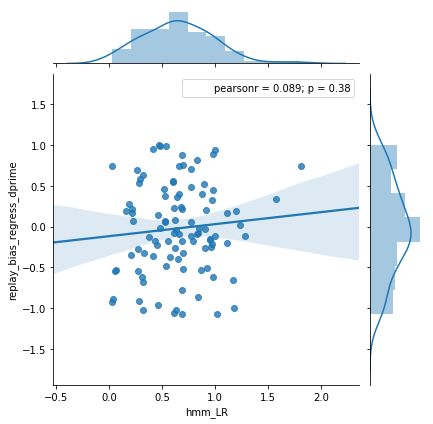

In [25]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime', 'hmm_LR']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
    
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias
data_sub.dropna(inplace=True)

data_sub = data_sub.assign(
    replay_bias_regress_dprime=jzap.analysis.regress_out(data_sub.csp_replay_bias, data_sub.hmm_dprime))

sns.jointplot(x='hmm_criterion', y='replay_bias_regress_dprime', data=data_sub, kind='reg')
sns.jointplot(x='hmm_LR', y='replay_bias_regress_dprime', data=data_sub, kind='reg')

In [26]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

formula = 'csp_replay_bias ~ hmm_criterion + hmm_dprime'

# 0s in the dependent variable still converges, but LL is infinite
data_sub.csp_replay_bias.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gaussian()

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            166.1076 
Link Function:      identity         BIC:            -383.2142
Dependent Variable: csp_replay_bias  Log-Likelihood: -80.054  
Date:               2018-05-19 00:58 LL-Null:        -81.030  
No. Observations:   94               Deviance:       30.226   
Df Model:           2                Pearson chi2:   30.2     
Df Residuals:       91               Scale:          0.33215  
Method:             IRLS                                      
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------
Intercept        0.1008   0.1134  0.8884 0.3743 -0.1215 0.3231
hmm_criterion   -0.0496   0.1846 -0.2687 0.7882 -0.4115 0.3123
hmm_dprime      -0.0706   0.0514 -1.3729 0.1698 -0.1713 0.0302



In [27]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_LR', 'hmm_dprime']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

formula = 'csp_replay_bias ~ hmm_LR + hmm_dprime'

# 0s in the dependent variable still converges, but LL is infinite
data_sub.csp_replay_bias.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gaussian()

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            165.1706 
Link Function:      identity         BIC:            -383.5140
Dependent Variable: csp_replay_bias  Log-Likelihood: -79.585  
Date:               2018-05-19 00:58 LL-Null:        -81.030  
No. Observations:   94               Deviance:       29.926   
Df Model:           2                Pearson chi2:   29.9     
Df Residuals:       91               Scale:          0.32886  
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept   -0.0773    0.2153  -0.3592  0.7195  -0.4994  0.3447
hmm_LR       0.1988    0.2004   0.9922  0.3211  -0.1939  0.5916
hmm_dprime  -0.0396    0.0557  -0.7104  0.4775  -0.1487  0.0696



In [28]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

formula = 'csp_replay_bias ~ hmm_criterion + hmm_dprime_noneutral'

# 0s in the dependent variable still converges, but LL is infinite
data_sub.csp_replay_bias.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gaussian()

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             165.8280 
Link Function:         identity          BIC:             -383.3040
Dependent Variable:    csp_replay_bias   Log-Likelihood:  -79.914  
Date:                  2018-05-19 00:58  LL-Null:         -81.030  
No. Observations:      94                Deviance:        30.136   
Df Model:              2                 Pearson chi2:    30.1     
Df Residuals:          91                Scale:           0.33116  
Method:                IRLS                                        
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept             0.1242   0.1213  1.0240 0.3058 -0.1135 0.3619
hmm_criterion        -0.0481   0.1830 -0.2630 0.7925 -0.4068 0.3106
hmm_dprime_noneutral -0.0779   0.0530 -1.4702 0.1415 -0.1817 0.02

## Criterion vs. replay bias

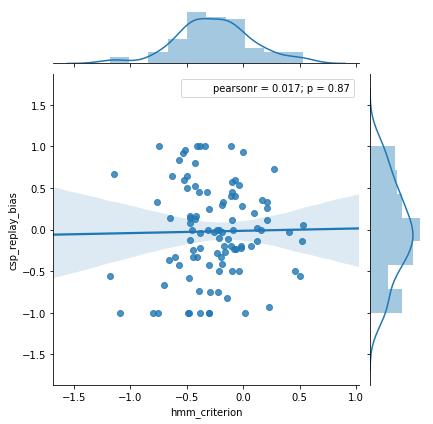

In [29]:
data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral', 'hmm_LR']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

sns.jointplot(x='hmm_criterion', y='csp_replay_bias', data=data_sub, kind='reg')

Removing the days with the fewest replays makes the fit worse

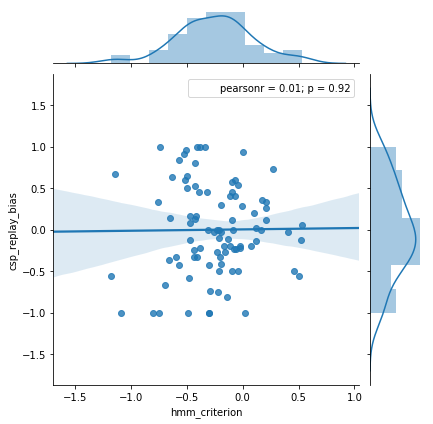

In [30]:
data_sub = data[[
    'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_all',
    'hmm_criterion', 'hmm_dprime_noneutral', 'hmm_LR']]
data_sub = data_sub[
    data_sub.replay_freq_0_1_all > data_sub.replay_freq_0_1_all.quantile(0.1)]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - \
                   data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

sns.jointplot(x='hmm_criterion', y='csp_replay_bias', data=data_sub, kind='reg')

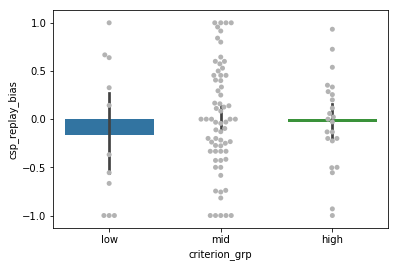

In [31]:
data_sub = data[[
    'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_all',
    'hmm_criterion', 'hmm_dprime_noneutral', 'hmm_LR']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

data_sub['criterion_grp'] = pd.cut(data_sub['hmm_criterion'], 3, labels=['low', 'mid', 'high'])

sns.barplot(x='criterion_grp', y='csp_replay_bias', data=data_sub)
sns.swarmplot(x='criterion_grp', y='csp_replay_bias', data=data_sub, color='0.7')

               Results: Generalized linear model
Model:              GLM                 AIC:            -inf  
Link Function:      log                 BIC:            3.6476
Dependent Variable: replay_freq_0_1_all Log-Likelihood: inf   
Date:               2018-05-19 00:58    LL-Null:        inf   
No. Observations:   103                 Deviance:       471.76
Df Model:           1                   Pearson chi2:   122.  
Df Residuals:       101                 Scale:          1.2041
Method:             IRLS                                      
--------------------------------------------------------------
               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------
Intercept     -3.9602   0.2082 -19.0204 0.0000 -4.3683 -3.5521
hmm_dprime    -0.3248   0.0882  -3.6813 0.0002 -0.4977 -0.1519



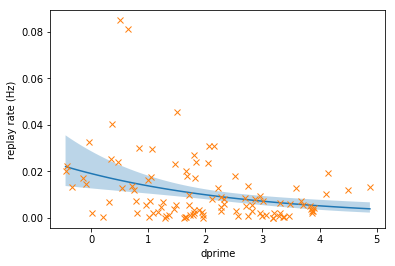

In [32]:
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse', 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

exog = glm.exog
x_val = np.linspace(exog[:, 1].min(), exog[:, 1].max(), exog.shape[0])
exog[:, 1] = x_val
predict = glm_results.get_prediction(exog)

fig, ax = plt.subplots()
ax.plot(x_val, predict.predicted_mean)
ax.fill_between(x_val, predict.conf_int()[:, 0], predict.conf_int()[:, 1], alpha=0.3)
ax.plot(data_sub.hmm_dprime, data_sub.replay_freq_0_1_all, 'x')
ax.set_xlabel('dprime')
ax.set_ylabel('replay rate (Hz)');

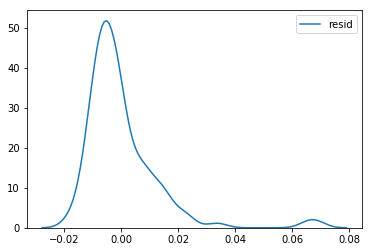

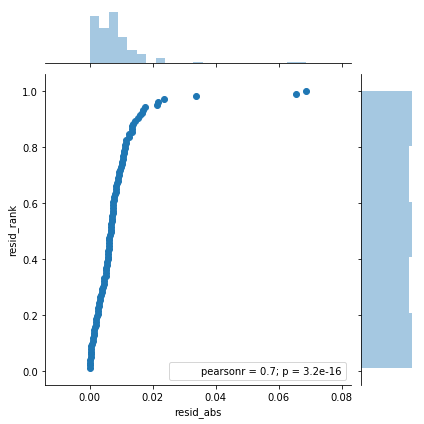

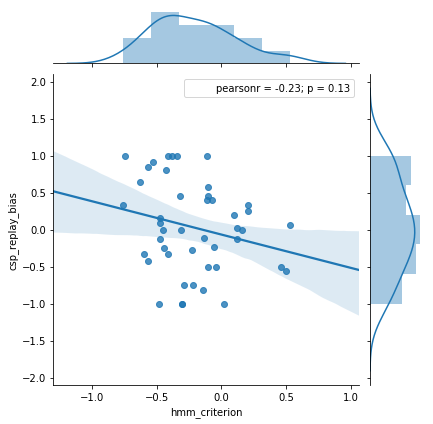

In [33]:
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[[
    'replay_freq_0_1_all', 'mouse', 'hmm_dprime', 'replay_freq_0_1_plus',
    'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral',
    'hmm_LR']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = glm_results.resid_response
data_sub['resid_abs'] = np.abs(data_sub['resid'])

data_sub['resid_rank'] = data_sub.resid_abs.rank() / data_sub.resid_abs.rank().max()

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])

csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan

data_sub['csp_replay_bias'] = csp_replay_bias

sns.kdeplot(data_sub['resid'])
sns.jointplot(x='resid_abs', y='resid_rank', data=data_sub)
sns.jointplot(x='hmm_criterion', y='csp_replay_bias', data=data_sub[data_sub.resid_rank > 0.5], kind='reg')

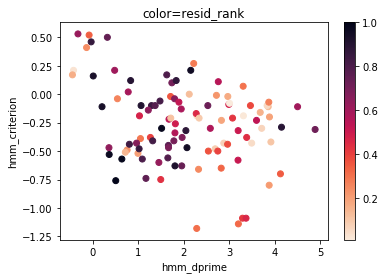

In [34]:
x_label = 'hmm_dprime'
y_label = 'hmm_criterion'
hue = 'resid_rank'
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[[
    'replay_freq_0_1_all', 'mouse', 'hmm_dprime', 'replay_freq_0_1_plus',
    'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = np.abs(glm_results.resid_response)
data_sub['resid_rank'] = data_sub.resid.rank() / data_sub.resid.rank().max()


# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data_sub[[x_label, y_label, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x_label])
y_data = np.array(data_no_nan[y_label])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('color={}'.format(hue));

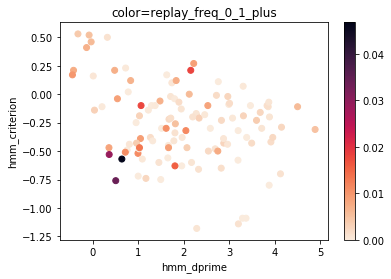

In [35]:
x_label = 'hmm_dprime'
y_label = 'hmm_criterion'
hue = 'replay_freq_0_1_plus'
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[[
    'replay_freq_0_1_all', 'mouse', 'hmm_dprime', 'replay_freq_0_1_plus',
    'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = np.abs(glm_results.resid_response)
data_sub['resid_rank'] = data_sub.resid.rank() / data_sub.resid.rank().max()


# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data_sub[[x_label, y_label, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x_label])
y_data = np.array(data_no_nan[y_label])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('color={}'.format(hue));

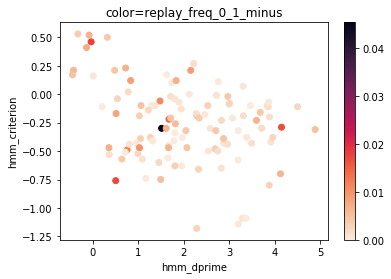

In [36]:
x_label = 'hmm_dprime'
y_label = 'hmm_criterion'
hue = 'replay_freq_0_1_minus'
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[[
    'replay_freq_0_1_all', 'mouse', 'hmm_dprime', 'replay_freq_0_1_plus',
    'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = np.abs(glm_results.resid_response)
data_sub['resid_rank'] = data_sub.resid.rank() / data_sub.resid.rank().max()


# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data_sub[[x_label, y_label, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x_label])
y_data = np.array(data_no_nan[y_label])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('color={}'.format(hue));

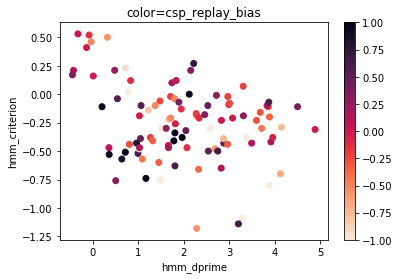

In [37]:
x_label = 'hmm_dprime'
y_label = 'hmm_criterion'
hue = 'csp_replay_bias'
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[[
    'replay_freq_0_1_all', 'mouse', 'hmm_dprime', 'replay_freq_0_1_plus',
    'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = np.abs(glm_results.resid_response)
data_sub['resid_rank'] = data_sub.resid.rank() / data_sub.resid.rank().max()

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data_sub[[x_label, y_label, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x_label])
y_data = np.array(data_no_nan[y_label])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('color={}'.format(hue));

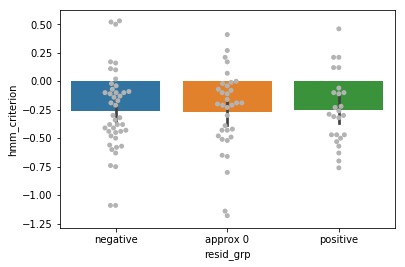

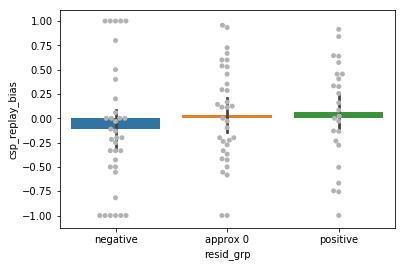

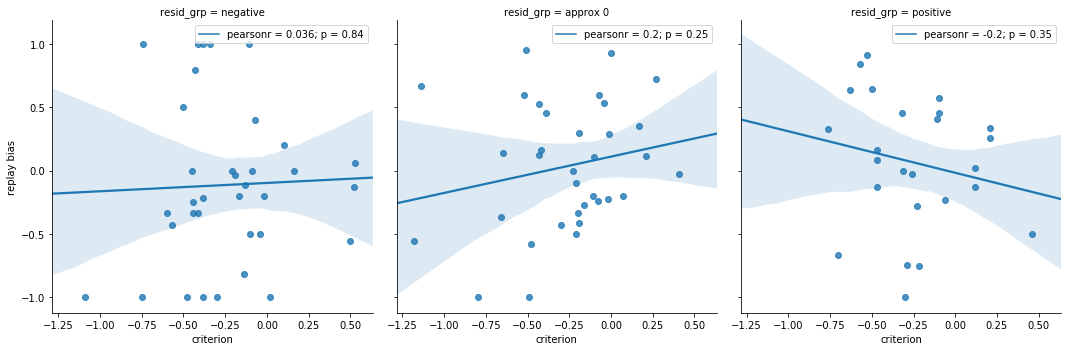

In [38]:
x_label = 'hmm_dprime'
y_label = 'hmm_criterion'
hue = 'csp_replay_bias'
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[[
    'replay_freq_0_1_all', 'mouse', 'hmm_dprime', 'replay_freq_0_1_plus',
    'replay_freq_0_1_minus', 'hmm_criterion', 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = glm_results.resid_response
# data_sub['resid_rank'] = data_sub.resid.rank() / data_sub.resid.rank().max()

data_sub['resid_grp'] = pd.cut(data_sub['resid'], [-np.inf, -0.005, 0.005, np.inf], labels=['negative', 'approx 0', 'positive'])

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

fig, ax = plt.subplots()
sns.barplot(x='resid_grp', y='hmm_criterion', data=data_sub, ax=ax)
sns.swarmplot(x='resid_grp', y='hmm_criterion', data=data_sub, color='0.7', ax=ax)

fig, ax = plt.subplots()
sns.barplot(x='resid_grp', y='csp_replay_bias', data=data_sub, ax=ax)
sns.swarmplot(x='resid_grp', y='csp_replay_bias', data=data_sub, color='0.7', ax=ax)

g = sns.lmplot(
    x='hmm_criterion', y='csp_replay_bias',
    data=data_sub, col='resid_grp')
g.set_xlabels('criterion')
g.set_ylabels('replay bias')
jzap.plotting.misc.add_stats_to_facet_grid(g, scipy.stats.pearsonr)


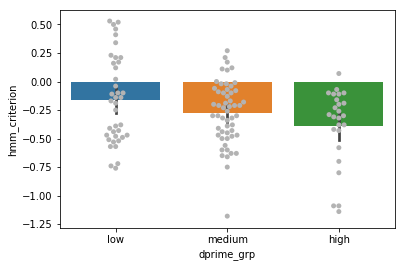

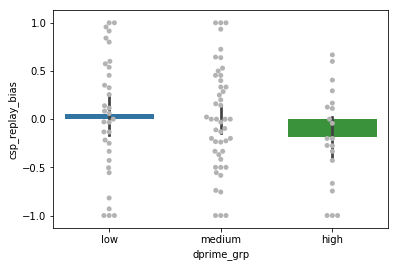

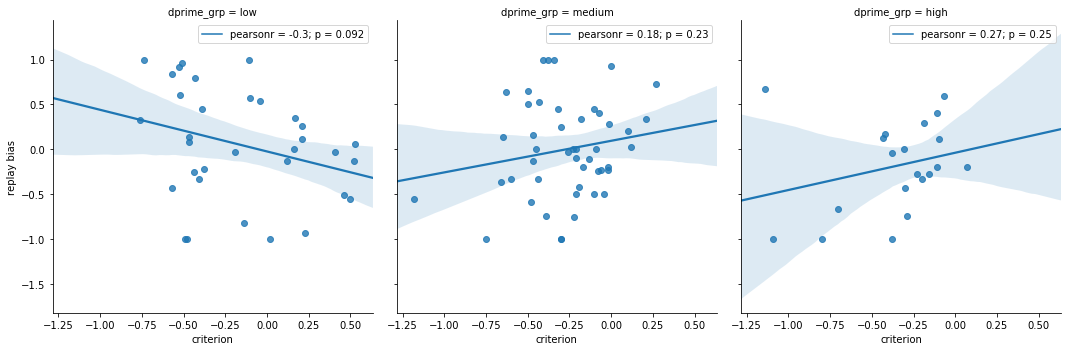

In [39]:
x_label = 'hmm_dprime'
y_label = 'hmm_criterion'
hue = 'csp_replay_bias'
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[['hmm_dprime',
                 'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_criterion']]

data_sub['dprime_grp'] = pd.cut(data_sub['hmm_dprime'], 3, labels=['low', 'medium', 'high'])

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

fig, ax = plt.subplots()
sns.barplot(x='dprime_grp', y='hmm_criterion', data=data_sub, ax=ax)
sns.swarmplot(x='dprime_grp', y='hmm_criterion', data=data_sub, color='0.7', ax=ax)

fig, ax = plt.subplots()
sns.barplot(x='dprime_grp', y='csp_replay_bias', data=data_sub, ax=ax)
sns.swarmplot(x='dprime_grp', y='csp_replay_bias', data=data_sub, color='0.7', ax=ax)

g = sns.lmplot(
    x='hmm_criterion', y='csp_replay_bias',
    data=data_sub, col='dprime_grp')
g.set_xlabels('criterion')
g.set_ylabels('replay bias')
jzap.plotting.misc.add_stats_to_facet_grid(g, scipy.stats.pearsonr)


In [40]:
formula = 'd_hmm_criterion_next ~ replay_freq_0_1_plus + replay_freq_0_1_minus + replay_freq_0_1_neutral + d_day_next'

data_sub = data[['mouse', 'd_hmm_criterion_next', 'd_day_next', 'mouse',
                 'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gaussian()

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())
print data_sub.describe()

                    Results: Generalized linear model
Model:                 GLM                    AIC:              81.2655  
Link Function:         identity               BIC:              -370.8517
Dependent Variable:    d_hmm_criterion_next   Log-Likelihood:   -35.633  
Date:                  2018-05-19 00:58       LL-Null:          -38.542  
No. Observations:      90                     Deviance:         11.632   
Df Model:              4                      Pearson chi2:     11.6     
Df Residuals:          85                     Scale:            0.13685  
Method:                IRLS                                              
-------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------------
Intercept                -0.0181   0.0570 -0.3181 0.7504  -0.1300  0.0937
replay_freq_0_1_plus     10.6126  11.1579  0.9511 0.3415 -

In [41]:
formula = 'd_hmm_criterion_next ~ csp_replay_bias + replay_freq_0_1_all'

data_sub = data[['mouse', 'd_hmm_criterion_next', 'd_day_next', 'mouse',
                 'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral', 'replay_freq_0_1_all']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gaussian()

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:              GLM                  AIC:            67.0018  
Link Function:      identity             BIC:            -332.6958
Dependent Variable: d_hmm_criterion_next Log-Likelihood: -30.501  
Date:               2018-05-19 00:58     LL-Null:        -32.517  
No. Observations:   81                   Deviance:       10.071   
Df Model:           2                    Pearson chi2:   10.1     
Df Residuals:       78                   Scale:          0.12912  
Method:             IRLS                                          
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
Intercept            0.0179   0.0519  0.3445 0.7305 -0.0838 0.1196
csp_replay_bias      0.1474   0.0751  1.9639 0.0495  0.0003 0.2945
replay_freq_0_1_all -1.9614   2.7636 -0.7097 0.4779 -7.3779 3.4552



In [42]:
formula = 'csp_replay_bias ~ d_hmm_criterion_prev'

data_sub = data[['mouse', 'd_hmm_criterion_prev', 'd_day_next', 'mouse',
                 'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral', 'replay_freq_0_1_all']]

csp_replay_bias = (data_sub['replay_freq_0_1_plus'] - data_sub['replay_freq_0_1_minus']) / \
    (data_sub['replay_freq_0_1_plus'] + data_sub['replay_freq_0_1_minus'])
csp_replay_bias[~np.isfinite(csp_replay_bias)] = np.nan
data_sub['csp_replay_bias'] = csp_replay_bias

# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gaussian()

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             151.3624 
Link Function:         identity          BIC:             -368.8898
Dependent Variable:    csp_replay_bias   Log-Likelihood:  -73.681  
Date:                  2018-05-19 00:58  LL-Null:         -73.682  
No. Observations:      90                Deviance:        27.093   
Df Model:              1                 Pearson chi2:    27.1     
Df Residuals:          88                Scale:           0.30788  
Method:                IRLS                                        
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept            -0.0100   0.0585 -0.1710 0.8642 -0.1248 0.1047
d_hmm_criterion_prev -0.0061   0.1588 -0.0386 0.9692 -0.3173 0.3051



Take the 90% of sessions best fit by dprime, and replay is strongly predicted by plus performance, not minus

In [43]:
formula = 'replay_freq_0_1_all ~ hmm_dprime_noneutral'

data_sub = data[['replay_freq_0_1_all', 'mouse', 'hmm_dprime_noneutral',
                 'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'hmm_behavior_plus', 'hmm_behavior_minus']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()

data_sub['resid'] = np.abs(glm_results.resid_response)
data_sub['resid_rank'] = data_sub.resid.rank() / data_sub.resid.rank().max()

formula = 'replay_freq_0_1_plus ~ hmm_behavior_plus + hmm_behavior_minus'
y, X = patsy.dmatrices(formula, data_sub[data_sub['resid_rank'] < 0.9], return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:               GLM                  AIC:            -inf    
Link Function:       log                  BIC:            862.1918
Dependent Variable:  replay_freq_0_1_plus Log-Likelihood: inf     
Date:                2018-05-19 00:58     LL-Null:        inf     
No. Observations:    92                   Deviance:       1264.6  
Df Model:            2                    Pearson chi2:   120.    
Df Residuals:        89                   Scale:          1.3537  
Method:              IRLS                                         
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -3.8241   0.7695 -4.9699 0.0000 -5.3322 -2.3160
hmm_behavior_plus  -2.0951   0.7266 -2.8834 0.0039 -3.5193 -0.6710
hmm_behavior_minus -0.4517   0.8148 -0.5544 0.5793 -2.0488  1.1453



This didn't really work

                 Results: Generalized linear model
Model:              GLM                   AIC:            -inf    
Link Function:      log                   BIC:            581.5258
Dependent Variable: replay_freq_0_1_minus Log-Likelihood: inf     
Date:               2018-05-19 00:58      LL-Null:        inf     
No. Observations:   111                   Deviance:       1094.9  
Df Model:           1                     Pearson chi2:   241.    
Df Residuals:       109                   Scale:          2.2139  
Method:             IRLS                                          
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -5.9200    0.1894  -31.2486  0.0000  -6.2913  -5.5487
false_prime    0.0042    0.0020    2.1187  0.0341   0.0003   0.0081



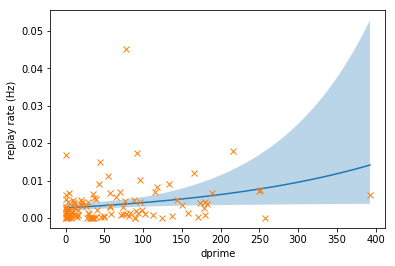

In [44]:
formula = 'replay_freq_0_1_minus ~ false_prime'

data_sub = data[['replay_freq_0_1_minus', 'mouse', 'hmm_nfalse_plus', 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

data_sub['false_prime'] = data_sub.hmm_nfalse_plus.multiply(-1*(data_sub.hmm_dprime - data_sub.hmm_dprime.max()))

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

exog = glm.exog
x_val = np.linspace(exog[:, 1].min(), exog[:, 1].max(), exog.shape[0])
exog[:, 1] = x_val
predict = glm_results.get_prediction(exog)

fig, ax = plt.subplots()
ax.plot(x_val, predict.predicted_mean)
ax.fill_between(x_val, predict.conf_int()[:, 0], predict.conf_int()[:, 1], alpha=0.3)
ax.plot(data_sub.false_prime, data_sub.replay_freq_0_1_minus, 'x')
ax.set_xlabel('dprime')
ax.set_ylabel('replay rate (Hz)');

In [45]:
formula = 'replay_freq_0_1_minus ~ hmm_dprime + hmm_LR'

data_sub = data[['replay_freq_0_1_minus', 'mouse', 'hmm_dprime', 'hmm_LR']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

# exog = glm.exog
# x_val = np.linspace(exog[:, 1].min(), exog[:, 1].max(), exog.shape[0])
# exog[:, 1] = x_val
# predict = glm_results.get_prediction(exog)

# fig, ax = plt.subplots()
# ax.plot(x_val, predict.predicted_mean)
# ax.fill_between(x_val, predict.conf_int()[:, 0], predict.conf_int()[:, 1], alpha=0.3)
# ax.plot(data_sub.hmm_dprime, data_sub.replay_freq_0_1_all, 'x')
# ax.set_xlabel('dprime')
# ax.set_ylabel('replay rate (Hz)');

                 Results: Generalized linear model
Model:              GLM                   AIC:            -851.6003
Link Function:      log                   BIC:            -318.2914
Dependent Variable: replay_freq_0_1_minus Log-Likelihood: 428.80   
Date:               2018-05-19 00:58      LL-Null:        426.85   
No. Observations:   97                    Deviance:       111.73   
Df Model:           2                     Pearson chi2:   167.     
Df Residuals:       94                    Scale:          1.7745   
Method:             IRLS                                           
--------------------------------------------------------------------
                 Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       -4.9987    0.5049  -9.8998  0.0000  -5.9883  -4.0090
hmm_dprime      -0.2173    0.1254  -1.7332  0.0831  -0.4631   0.0284
hmm_LR          -0.1203    0.4679  -0.2572  0.7971  -1.0373 

# Stats models

In [46]:
formula = 'replay_freq_0_1_all ~ hmm_dprime_noneutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime_noneutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replay_freq_0_1_all.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                  AIC:             -695.6499
Link Function:        log                  BIC:             -320.5120
Dependent Variable:   replay_freq_0_1_all  Log-Likelihood:  349.82   
Date:                 2018-05-19 00:58     LL-Null:         340.97   
No. Observations:     98                   Deviance:        119.64   
Df Model:             1                    Pearson chi2:    102.     
Df Residuals:         96                   Scale:           1.0657   
Method:               IRLS                                           
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -3.8499   0.2131 -18.0677 0.0000 -4.2676 -3.4323
hmm_dprime_noneutral -0.3419   0.0884  -3.8690 0.0001 -0.5151 -0.1687



In [47]:
formula = 'replay_freq_0_1_all ~ hmm_behavior'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replay_freq_0_1_all.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                Results: Generalized linear model
Model:              GLM                 AIC:            -696.5491
Link Function:      log                 BIC:            -321.7206
Dependent Variable: replay_freq_0_1_all Log-Likelihood: 350.27   
Date:               2018-05-19 00:58    LL-Null:        340.00   
No. Observations:   98                  Deviance:       118.44   
Df Model:           1                   Pearson chi2:   93.8     
Df Residuals:       96                  Scale:          0.97697  
Method:             IRLS                                         
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -2.1802    0.5742  -3.7967  0.0001  -3.3057  -1.0547
hmm_behavior  -3.0643    0.7236  -4.2350  0.0000  -4.4825  -1.6462



In [48]:
# hmm_behavior_pm not working at the moment
# formula = 'replay_freq_0_1_all ~ hmm_behavior_pm'

# data_sub = data[['replay_freq_0_1_all', 'mouse',
#                  'hmm_behavior_pm']]

# # 0s in the dependent variable still converges, but LL is infinite
# data_sub.replay_freq_0_1_all.replace(0, np.nan, inplace=True)

# y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
# X = sm.add_constant(X)

# family = sm.families.Gamma(link=sm.families.links.log)

# glm = sm.GLM(y, X, family=family)
# glm_results = glm.fit()
# print(glm_results.summary2())

In [49]:
formula = 'replay_freq_0_1_plus ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_plus', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replay_freq_0_1_plus.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                  AIC:            -840.4330
Link Function:        log                  BIC:            -299.8084
Dependent Variable:   replay_freq_0_1_plus Log-Likelihood: 424.22   
Date:                 2018-05-19 00:58     LL-Null:        407.02   
No. Observations:     94                   Deviance:       109.09   
Df Model:             3                    Pearson chi2:   93.4     
Df Residuals:         90                   Scale:          1.0375   
Method:               IRLS                                          
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -2.3151   0.6022 -3.8446 0.0001 -3.4953 -1.1349
hmm_behavior_plus    -1.0782   0.6501 -1.6585 0.0972 -2.3523  0.1960
hmm_behavior_minus   -4.9231   1.0248 -4.8039 0.000

In [50]:
formula = 'replay_freq_0_1_plus ~ hmm_dprime_noneutral + hmm_criterion'

data_sub = data[['replay_freq_0_1_plus', 'mouse',
                 'hmm_criterion', 'hmm_dprime_noneutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replay_freq_0_1_plus.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:               GLM                   AIC:             -833.3339
Link Function:       log                   BIC:             -296.3965
Dependent Variable:  replay_freq_0_1_plus  Log-Likelihood:  419.67   
Date:                2018-05-19 00:58      LL-Null:         408.62   
No. Observations:    94                    Deviance:        117.04   
Df Model:            2                     Pearson chi2:    114.     
Df Residuals:        91                    Scale:           1.2545   
Method:              IRLS                                            
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -4.7139   0.2309 -20.4171 0.0000 -5.1664 -4.2613
hmm_dprime_noneutral -0.4133   0.0990  -4.1757 0.0000 -0.6073 -0.2193
hmm_criterion        -0.4207   0.3745 

In [51]:
formula = 'replay_freq_0_1_minus ~ hmm_dprime_noneutral + hmm_criterion'

data_sub = data[['replay_freq_0_1_minus', 'mouse',
                 'hmm_criterion', 'hmm_dprime_noneutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replay_freq_0_1_minus.replace(0, np.nan, inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                   AIC:            -850.0529
Link Function:        log                   BIC:            -318.8043
Dependent Variable:   replay_freq_0_1_minus Log-Likelihood: 428.03   
Date:                 2018-05-19 00:58      LL-Null:        425.99   
No. Observations:     97                    Deviance:       111.22   
Df Model:             2                     Pearson chi2:   172.     
Df Residuals:         94                    Scale:          1.8301   
Method:               IRLS                                           
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -5.0492   0.2787 -18.1152 0.0000 -5.5955 -4.5029
hmm_dprime_noneutral -0.2057   0.1189  -1.7294 0.0837 -0.4388  0.0274
hmm_criterion         0.1258   0.4334 

## Visualize minus behavior better predicting neutral replay

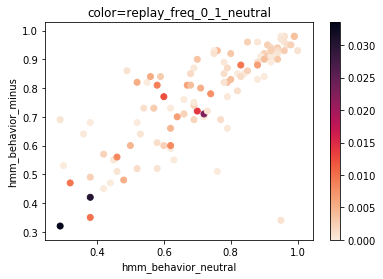

In [52]:
x = 'hmm_behavior_neutral'
y = 'hmm_behavior_minus'
hue = 'replay_freq_0_1_neutral'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
x_data = np.array(data_no_nan[x])
y_data = np.array(data_no_nan[y])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x)
plt.ylabel(y)
plt.title('color={}'.format(hue));

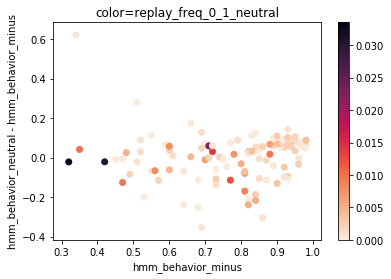

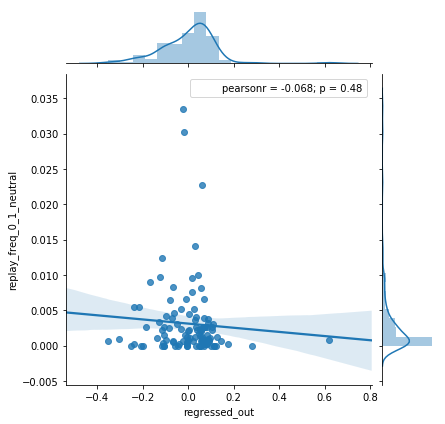

In [53]:
x = 'hmm_behavior_minus'
y = 'hmm_behavior_neutral'
y_regress_out = 'hmm_behavior_minus'
hue = 'replay_freq_0_1_neutral'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[list(set([x, y, y_regress_out, hue]))]
data_no_nan.dropna(inplace=True)
data_no_nan = data_no_nan.assign(
    regressed_out=jzap.analysis.regress_out(
        data_no_nan[y], data_no_nan[y_regress_out]) - data_no_nan[y].mean())
x_data = np.array(data_no_nan[x])
y_data = np.array(data_no_nan['regressed_out'])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x)
plt.ylabel('{} - {}'.format(y, y_regress_out))
plt.title('color={}'.format(hue))

sns.jointplot(x='regressed_out', y=hue, data=data_no_nan, kind='reg');

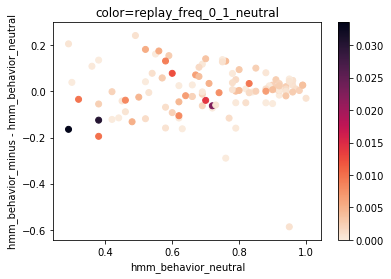

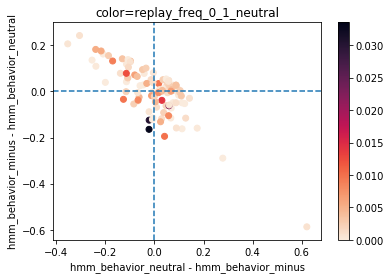

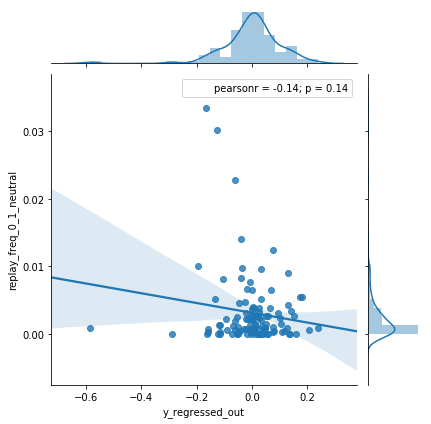

In [54]:
x = 'hmm_behavior_neutral'
y = 'hmm_behavior_minus'
hue = 'replay_freq_0_1_neutral'
# cmap = sns.cubehelix_palette(light=0.85, dark=0.15, as_cmap=True)
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()
data_no_nan = data[[x, y, hue]]
data_no_nan.dropna(inplace=True)
data_no_nan = data_no_nan.assign(
    y_regressed_out=jzap.analysis.regress_out(
        data_no_nan[y], data_no_nan[x]) - data_no_nan[y].mean(),
    x_regressed_out=jzap.analysis.regress_out(
        data_no_nan[x], data_no_nan[y]) - data_no_nan[x].mean())
x_data = np.array(data_no_nan[x])
y_data = np.array(data_no_nan['y_regressed_out'])
hue_data = np.array(data_no_nan[hue])

plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel(x)
plt.ylabel('{} - {}'.format(y, x))
plt.title('color={}'.format(hue))

fig, ax = plt.subplots()
x_data = np.array(data_no_nan['x_regressed_out'])
y_data = np.array(data_no_nan['y_regressed_out'])
plt.scatter(x_data, y_data, c=hue_data, cmap=cmap)
plt.colorbar(ax=ax)
plt.xlabel('{} - {}'.format(x, y))
plt.ylabel('{} - {}'.format(y, x))
plt.title('color={}'.format(hue))
ax.axvline(0, ls='--')
ax.axhline(0, ls='--')

sns.jointplot(x='y_regressed_out', y=hue, data=data_no_nan, kind='reg');